In [ ]:
# pip install numpy==1.26


   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   -- ------------------------------------- 1.0/15.8 MB 16.7 MB/s eta 0:00:01
   -- ------------------------------------- 1.0/15.8 MB 16.7 MB/s eta 0:00:01
   -- ------------------------------------- 1.0/15.8 MB 16.7 MB/s eta 0:00:01
   -- ------------------------------------- 1.0/15.8 MB 16.7 MB/s eta 0:00:01
   -- ------------------------------------- 1.0/15.8 MB 16.7 MB/s eta 0:00:01
   -- ------------------------------------- 1.0/15.8 MB 16.7 MB/s eta 0:00:01
   -- ------------------------------------- 1.0/15.8 MB 16.7 MB/s eta 0:00:01
   -- ------------------------------------- 1.0/15.8 MB 16.7 MB/s eta 0:00:01
   -- ------------------------------------- 1.0/15.8 MB 16.7 MB/s eta 0:00:01
   -- ------------------------------------- 1.0/15.8 MB 16.7 MB/s eta 0:00:01
   ----- ---------------------------------- 2.1/15.8 MB 788.2 kB/s eta 0:00:18
   ----- ---------------------------------- 2.1/15.8 MB 788.2 kB/s eta 

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
base_dir = "datos"
fake_dir = os.path.join(base_dir, "fake")
real_dir = os.path.join(base_dir, "real")

def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        try:
            img = Image.open(file_path).convert("RGB")  # Convertir a RGB
            img = img.resize((224, 224))  # Redimensionar a 224x224
            images.append(np.array(img))
            labels.append(label)
        except Exception as e:
            print(f"Error al cargar la imagen {file_path}: {e}")
    return images, labels

fake_images, fake_labels = load_images_from_folder(fake_dir, 0)  # 0 para 'fake'
real_images, real_labels = load_images_from_folder(real_dir, 1)  # 1 para 'real'


X = np.array(fake_images + real_images)
y = np.array(fake_labels + real_labels)


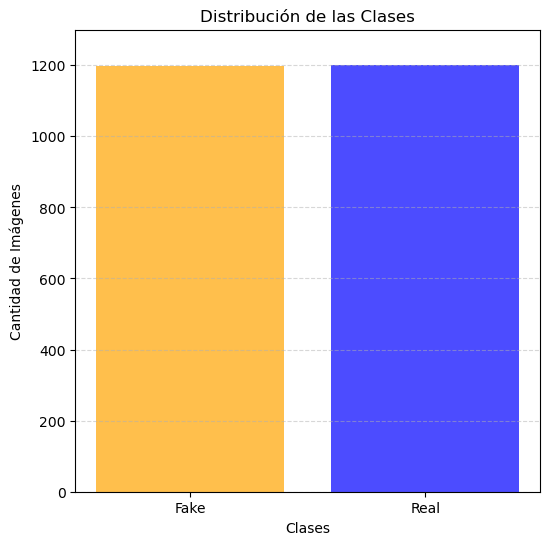

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Cantidades de cada clase
fake_count = 1199  # Número de imágenes en la clase 'fake'
real_count = 1200  # Número de imágenes en la clase 'real'

# Etiquetas y cantidades
labels = ['Fake', 'Real']
counts = [fake_count, real_count]

# Crear la gráfica de barras
plt.figure(figsize=(6, 6))
plt.bar(labels, counts, color=['orange', 'blue'], alpha=0.7)
plt.title('Distribución de las Clases')
plt.ylabel('Cantidad de Imágenes')
plt.xlabel('Clases')
plt.ylim(0, max(counts) + 100)  # Ajustar el límite superior para mayor claridad
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar la gráfica
plt.show()


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Dividir el restante (30%) en validación (50%) y prueba (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Confirmar las formas
print("Entrenamiento:", X_train.shape, y_train.shape)
print("Validación:", X_val.shape, y_val.shape)
print("Prueba:", X_test.shape, y_test.shape)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generador con data augmentation para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1.0/255,          # Normalización
    rotation_range=20,        # Rotación aleatoria
    width_shift_range=0.2,    # Desplazamiento horizontal
    height_shift_range=0.2,   # Desplazamiento vertical
    zoom_range=0.2,           # Zoom aleatorio
    horizontal_flip=True      # Inversión horizontal
)

# Generador sin data augmentation para validación y prueba
val_test_datagen = ImageDataGenerator(rescale=1.0/255)

# Crear generadores para cada conjunto
train_generator = train_datagen.flow(
    X_train, y_train,
    batch_size=32,
    shuffle=True
)

val_generator = val_test_datagen.flow(
    X_val, y_val,
    batch_size=32
)

test_generator = val_test_datagen.flow(
    X_test, y_test,
    batch_size=32
)

# Entrenamiento del modelo con data augmentation en el conjunto de entrenamiento



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    # layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  
])

# Compilar el modelo
with tf.device('/GPU:0'):
    model.compile(optimizer=Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

# Entrenar el modelo
with tf.device('/GPU:0'):
    history = model.fit(
        train_generator,
        epochs=15,
        validation_data=val_generator
    )

In [6]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Limitar el uso de la memoria de la GPU para evitar que se utilice toda
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
